In [1]:
!pip install tensorflow==1.14.0  # installing a old version of Tensorflow
import tensorflow as tf
print(tf.__version__)

ERROR: Invalid requirement: '#'
C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

1.14.0


C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Alfredo\Anaconda3\envs\tensorflow_cpu\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Alfredo\An

## Se quiere entrenar un perceptron multicapas para resolver la logica 
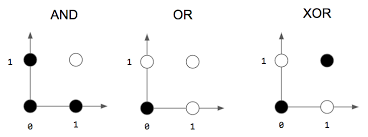
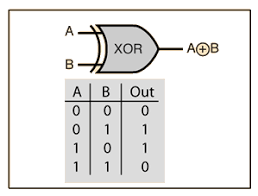

In [2]:
import numpy as np
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], np.float32)  # 4x2, input
y = np.array([[0], [1], [1], [0]], np.float32)                      # 4, correct output, AND operation
y = np.reshape(y, [4,1])

## Para resolver esta logica se requiere una red neuronal con una capa oculta (Red neuronal profunda)
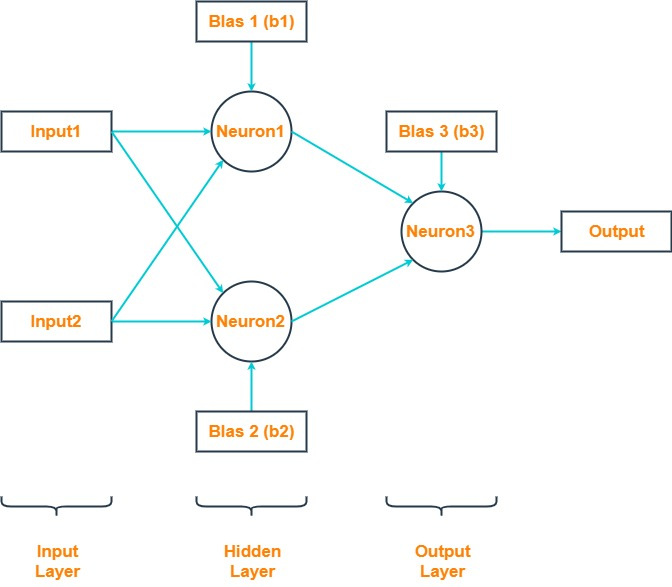

In [3]:
num_features = 2
num_iter = 20000
display_step = int(num_iter / 20)
learning_rate = 0.01

num_input = 2          # units in the input layer
num_hidden1 = 2        # units in the first hidden layer
num_output = 1         # units in the output, only one output 0 or 1

### Definimos la funcion percelptron multicapas (MLP),  los placeholders  e inicializamos los valores de pesos aleatoriamente

In [4]:
#%% mlp function

def multi_layer_perceptron_xor(x, weights, biases):

    hidden_layer1 = tf.add(tf.matmul(x, weights['w_h1']), biases['b_h1'])
    hidden_layer1 = tf.nn.sigmoid(hidden_layer1)

    out_layer = tf.add(tf.matmul(hidden_layer1, weights['w_out']), biases['b_out'])
    
    return out_layer

# trainum_inputg data and labels
X = tf.placeholder('float', [None, num_input])     # training data
Y = tf.placeholder('float', [None, num_output])    # labels


# weights and biases
weights = {
    'w_h1' : tf.Variable(tf.random_normal([num_input, num_hidden1])), # w1, from input layer to hidden layer 1
    'w_out': tf.Variable(tf.random_normal([num_hidden1, num_output])) # w2, from hidden layer 1 to output layer
}
biases = {
    'b_h1' : tf.Variable(tf.zeros([num_hidden1])),
    'b_out': tf.Variable(tf.zeros([num_output]))
}

model = multi_layer_perceptron_xor(X, weights, biases)


### Definimos la funcion de costo que se va a usar, que basicamente es la expresion matematica que compara la salida de la red neuronal y el valor esperado

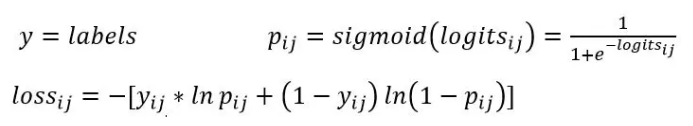

In [5]:
'''
- cost function and optimization
- sigmoid cross entropy -- single output
- softmax cross entropy -- multiple output, normalized
'''

# = - x * z + log(1 + exp(x))   donde   logits=x  y labels = y 

loss_func = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=model, labels=Y))
#loss_func = tf.reduce_mean(tf.squared_difference(Y,model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss_func)
#optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_func)


#correct_pred = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
#accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

cost_summary = tf.summary.scalar("cost",loss_func)
# Merge all summaries
all_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter("C:/Users/Alfredo/Documents/GitHub/RNP/tensorboard/mlp_xor", sess.graph)

epoch  0
loss= 2.78119
w[0,0] -1.6567091 W[1,0] -0.51398754
W[0,1] 0.7976175 W[1,1] 0.46169105
b[0] 3.571227e-05 b[1] -9.902727e-05


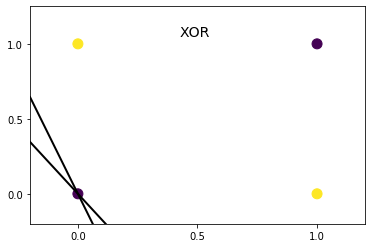

epoch  1000
loss= 2.74304
w[0,0] -1.7366167 W[1,0] -0.7925317
W[0,1] 0.84823126 W[1,1] 0.5690787
b[0] -0.06664641 b[1] 0.053929295


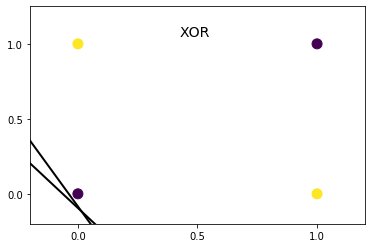

epoch  2000
loss= 2.68324
w[0,0] -1.944733 W[1,0] -1.3008935
W[0,1] 0.9245258 W[1,1] 0.7075357
b[0] -0.14604096 b[1] 0.13901381


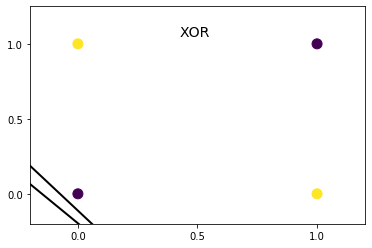

epoch  3000
loss= 2.56087
w[0,0] -2.341574 W[1,0] -1.9822887
W[0,1] 1.0228903 W[1,1] 0.8602242
b[0] -0.07193142 b[1] 0.24919862


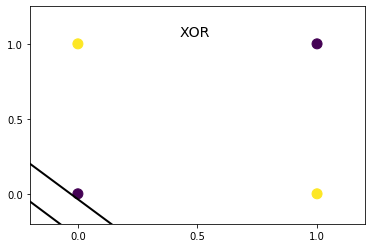

epoch  4000
loss= 2.39749
w[0,0] -2.890069 W[1,0] -2.7102704
W[0,1] 1.1257045 W[1,1] 1.0008792
b[0] 0.17025435 b[1] 0.38308525


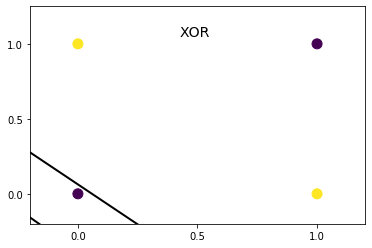

epoch  5000
loss= 2.25264
w[0,0] -3.4659913 W[1,0] -3.3742206
W[0,1] 1.2077581 W[1,1] 1.1047156
b[0] 0.4043644 b[1] 0.51810914


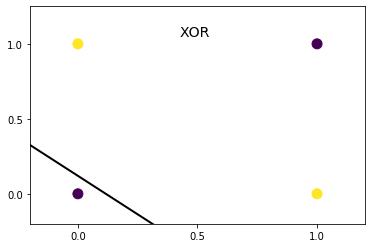

epoch  6000
loss= 2.15171
w[0,0] -3.9723284 W[1,0] -3.9203093
W[0,1] 1.2572682 W[1,1] 1.1648082
b[0] 0.5696084 b[1] 0.6178515


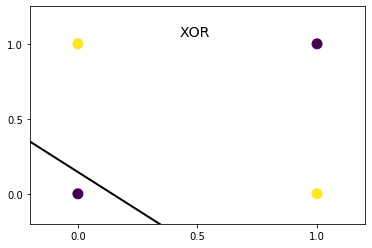

epoch  7000
loss= 2.08382
w[0,0] -4.391286 W[1,0] -4.358228
W[0,1] 1.2735324 W[1,1] 1.1842157
b[0] 0.68486243 b[1] 0.6558331


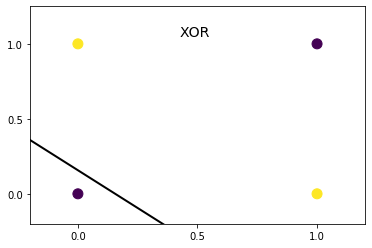

epoch  8000
loss= 2.03366
w[0,0] -4.7376103 W[1,0] -4.714412
W[0,1] 1.2569835 W[1,1] 1.1644174
b[0] 0.77109826 b[1] 0.60810876


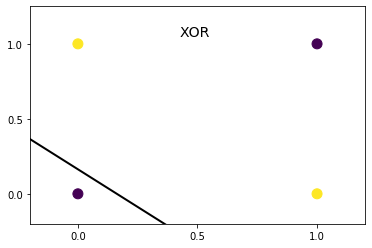

epoch  9000
loss= 1.98656
w[0,0] -5.029232 W[1,0] -5.0113263
W[0,1] 1.2058032 W[1,1] 1.1016358
b[0] 0.8429446 b[1] 0.4283298


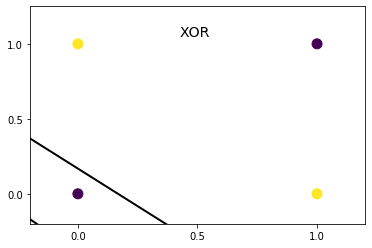

epoch  10000
loss= 1.91584
w[0,0] -5.2808733 W[1,0] -5.2650113
W[0,1] 1.1304218 W[1,1] 1.0011955
b[0] 0.9154228 b[1] 0.003794566


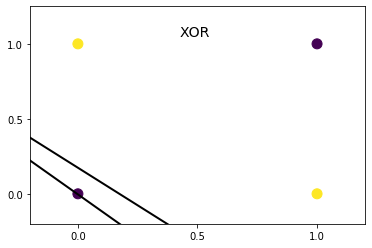

epoch  11000
loss= 1.75117
w[0,0] -5.503768 W[1,0] -5.485616
W[0,1] 1.1680152 W[1,1] 1.0246713
b[0] 1.0176175 b[1] -0.82682025


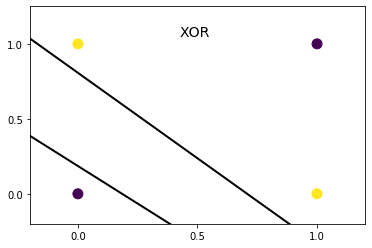

epoch  12000
loss= 1.38784
w[0,0] -5.703701 W[1,0] -5.681456
W[0,1] 1.5704869 W[1,1] 1.5063334
b[0] 1.1958421 b[1] -1.9813023


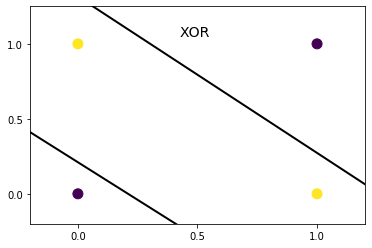

epoch  13000
loss= 0.91637
w[0,0] -5.876313 W[1,0] -5.8548737
W[0,1] 2.1960404 W[1,1] 2.1851199
b[0] 1.4514146 b[1] -3.1746705


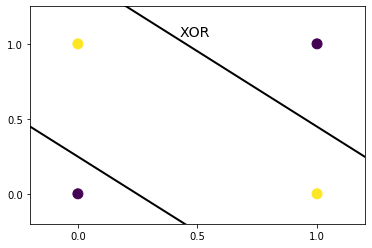

epoch  14000
loss= 0.58738
w[0,0] -6.0178924 W[1,0] -5.99892
W[0,1] 2.739885 W[1,1] 2.7373934
b[0] 1.7016045 b[1] -4.103628


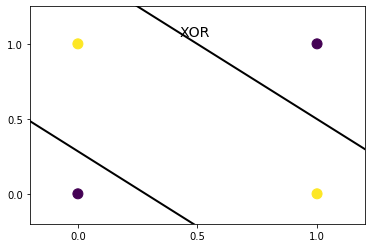

epoch  15000
loss= 0.40575
w[0,0] -6.133118 W[1,0] -6.1161923
W[0,1] 3.132509 W[1,1] 3.131131
b[0] 1.9004196 b[1] -4.755516


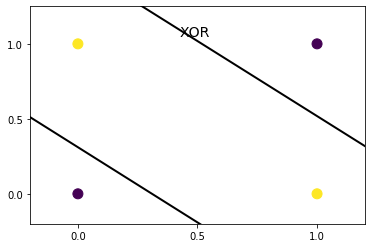

epoch  16000
loss= 0.30243
w[0,0] -6.2287955 W[1,0] -6.2134404
W[0,1] 3.4179232 W[1,1] 3.4167545
b[0] 2.0508301 b[1] -5.2242427


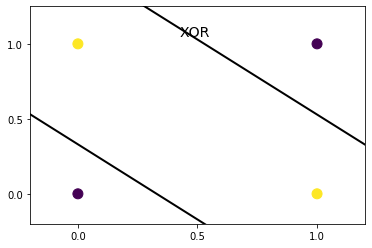

epoch  17000
loss= 0.23846
w[0,0] -6.310062 W[1,0] -6.2959394
W[0,1] 3.6349933 W[1,1] 3.6338842
b[0] 2.16596 b[1] -5.578252


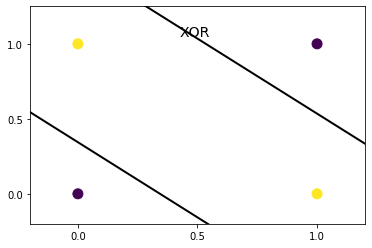

epoch  18000
loss= 0.19574
w[0,0] -6.380417 W[1,0] -6.367284
W[0,1] 3.807188 W[1,1] 3.8061066
b[0] 2.256482 b[1] -5.8574924


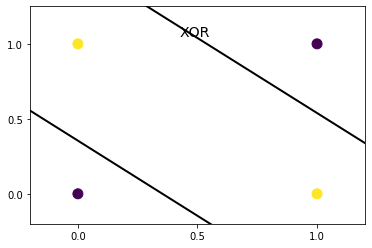

epoch  19000
loss= 0.16545
w[0,0] -6.4422717 W[1,0] -6.4299555
W[0,1] 3.9484441 W[1,1] 3.947382
b[0] 2.3296432 b[1] -6.085432


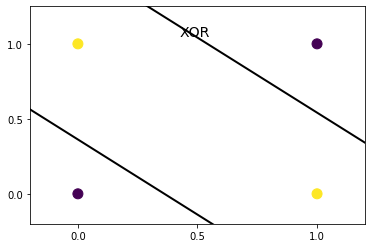

In [7]:
from matplotlib import pyplot as plt

for k in range(num_iter):
    tmp_cost, _ = sess.run([loss_func, optimizer], feed_dict={X: x, Y: y})
    if k % display_step == 0:
        #print('output: ', sess.run(model, feed_dict={X:x}))
        print('epoch ',k)
        print('loss= ' + "{:.5f}".format(tmp_cost))
        # Generate accuracy stats on test data 
        summary_results = sess.run(all_summary,feed_dict={X: x, Y: y})
        writer.add_summary(summary_results,k)
        
        
        
        # De aqui para abajo es para graficar 
        # separates the input space  
        W = np.squeeze(sess.run(weights['w_h1']))   # 2x2
        b = np.squeeze(sess.run(biases['b_h1']))    # 2,
        #%%
        print('w[0,0]',W[0,0],'W[1,0]',W[1,0])
        print('W[0,1]',W[0,1],'W[1,1]',W[1,1])
        print('b[0]',b[0],'b[1]',b[1])
        # Now plot the fitted line. We need only two points to plot the line
        plot_x = np.array([np.min(x[:, 0] - 0.2), np.max(x[:, 1]+0.2)])
        plot_y =  -1 / W[1, 0] * (W[0, 0] * plot_x + b[0])
        plot_y = np.reshape(plot_y, [2, -1])
        plot_y = np.squeeze(plot_y)

        plot_y2 = -1 / W[1, 1] * (W[0, 1] * plot_x + b[1])
        plot_y2 = np.reshape(plot_y2, [2, -1])
        plot_y2 = np.squeeze(plot_y2)

        ytemp = np.array([0, 1, 1, 0], np.float32)  
        #plt.scatter(x[:, 0], x[:, 1], c=y, s=100, cmap='viridis')
        plt.scatter(x[:, 0], x[:, 1], c=ytemp, s=100, cmap='viridis')
        plt.plot(plot_x, plot_y, color='k', linewidth=2)    # line 1
        plt.plot(plot_x, plot_y2, color='k', linewidth=2)   # line 2
        plt.xlim([-0.2, 1.2]); plt.ylim([-0.2, 1.25]);
        plt.text(0.425, 1.05, 'XOR', fontsize=14)
        plt.xticks([0.0, 0.5, 1.0]); plt.yticks([0.0, 0.5, 1.0])
        plt.show()

#%%

sess.close()